In [1]:
#import libraries, start bot
from javascript import require, On
import numpy as np
from matplotlib import pyplot as plt
import time

mineflayer = require('mineflayer')
pathfinder = require('mineflayer-pathfinder')

#create instance of the bot
bot = mineflayer.createBot({
    'host': 'localhost',
    'username': 'Kevin'
})

#get the movement set for pathfinder
bot.loadPlugin(pathfinder.pathfinder)
mcData = require('minecraft-data')(bot.version)
movements = pathfinder.Movements(bot, mcData)
RANGE_GOAL = 1

In [2]:
times = []
time1 = 0.0
time2 = 0.0

@On(bot, 'forcedMove')
def handleForcedMove(*args):
    global time1
    time1 = time.time()

@On(bot, 'scoreUpdated')
def handleScoreUpdate(scoreboard, updated, *args):
    #dont care about what the actual item is, just need to know when it updates
    global time2
    time2 = time.time()
    times.append(time2 - time1)



In [3]:
for i in range(14, 40):
    bot.chat(f'/tp 274 {i} 264 0 0')
    time.sleep(3)
    

In [17]:
times = np.array(times) ** 2
times = times.reshape(-1, 1)
print(times)

[[0.90154724]
 [1.00304119]
 [0.81288622]
 [1.11664762]
 [1.214084  ]
 [1.32629871]
 [1.35354989]
 [1.43995262]
 [1.57379216]
 [1.56178661]
 [1.69150964]
 [1.82534936]
 [1.824074  ]
 [1.96289793]
 [2.10530406]
 [2.10801432]
 [2.10920251]
 [2.40628922]
 [2.40561912]
 [2.56957436]
 [2.40519462]
 [2.72523585]
 [2.72021362]
 [2.89339767]
 [2.89231414]
 [3.06763829]]


In [19]:
from sklearn.linear_model import LinearRegression

heights = list(np.arange(10, 36)) #10-40

model = LinearRegression(fit_intercept=False)
model.fit(times, heights)

r_sq = model.score(times, heights)
print(r_sq)
print(f'slope: {model.coef_}')
print(f'intercept: {model.intercept_}')

0.986937296314295
slope: [11.66070962]
intercept: 0.0


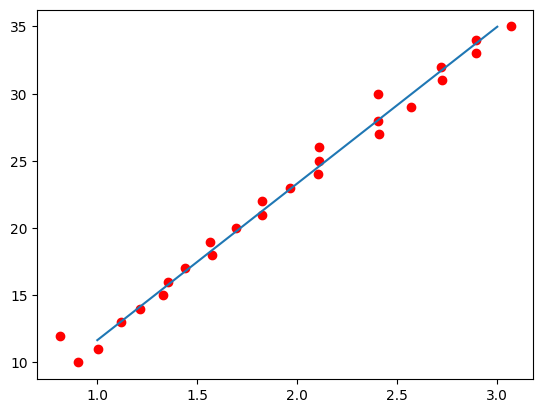

In [21]:
plt.plot(times, heights, 'ro')

x = np.arange(1, 4)
y = x * model.coef_[0]
plt.plot(x, y)

plt.show()